In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transactions with customers
transactions_customers = transactions.merge(customers, on='CustomerID', how='left')

# Merge with products
full_data = transactions_customers.merge(products, on='ProductID', how='left')


In [5]:
# Aggregate transaction data for each customer
customer_metrics = full_data.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    AvgSpend=('TotalValue', 'mean'),
    TotalTransactions=('TransactionID', 'count'),
    ProductDiversity=('ProductID', 'nunique')
).reset_index()

# Merge region information
customer_data = customer_metrics.merge(customers[['CustomerID', 'Region']], on='CustomerID')

# One-hot encode the 'Region' column
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)


In [6]:
# Select numerical columns for clustering
features = ['TotalSpend', 'AvgSpend', 'TotalTransactions', 'ProductDiversity']
scaled_data = StandardScaler().fit_transform(customer_data[features])

# Add back the categorical (region) data
scaled_data = np.hstack((scaled_data, customer_data.iloc[:, 5:].values))  # Include encoded regions


In [7]:
# Set number of clusters
n_clusters = 5  # Choose between 2 and 10

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Compute DB Index
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.1873637969275128


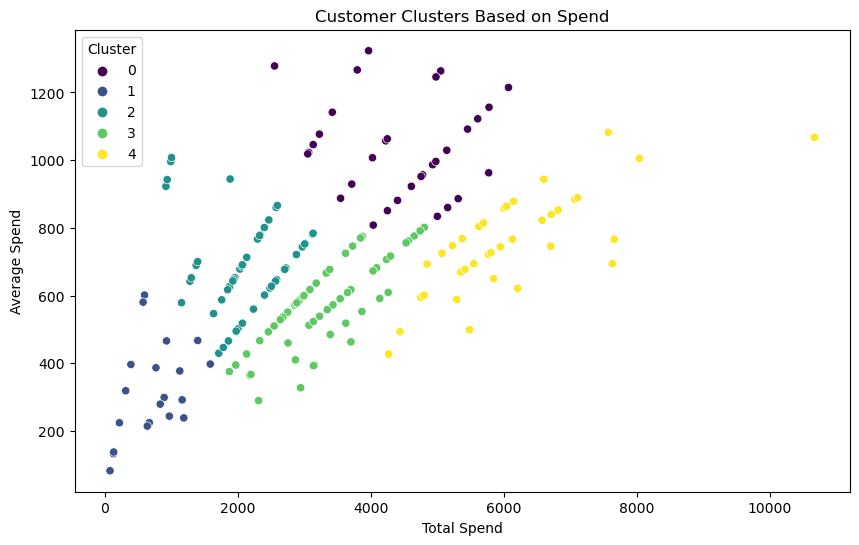

In [9]:
# Example: Scatter plot for the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data['TotalSpend'], 
    y=customer_data['AvgSpend'], 
    hue=customer_data['Cluster'], 
    palette='viridis'
)
plt.title('Customer Clusters Based on Spend')
plt.xlabel('Total Spend')
plt.ylabel('Average Spend')
plt.legend(title='Cluster')
plt.show()


In [13]:
# Save clustered customer data
customer_data.to_csv('Anirudh_Mekala_Clustering.csv', index=False)

print("Clustering results saved to Anirudh_Mekala_Clustering.csv")


Clustering results saved to Anirudh_Mekala_Clustering.csv


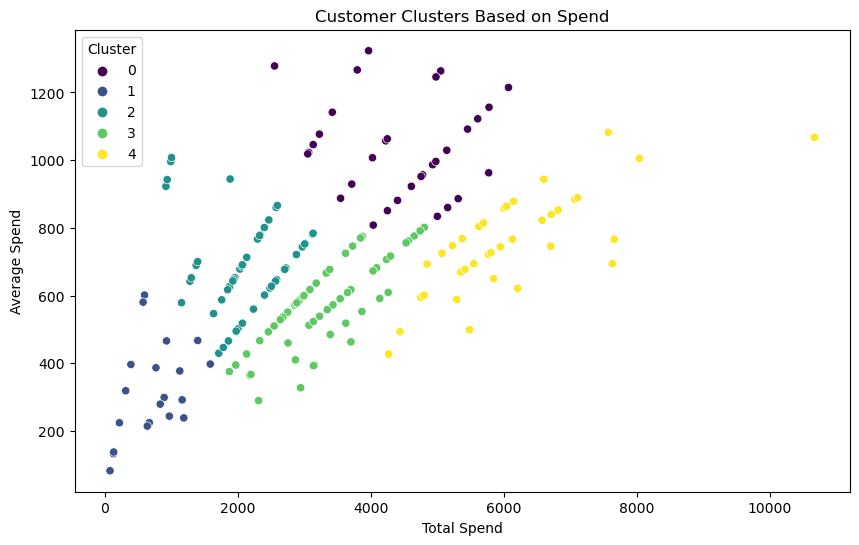

In [14]:
 # Visualizing Customer Clusters Based on Spending Patterns  
----#This scatter plot illustrates how customers are grouped into clusters based on their Total Spend and Average Spend. 
--#Each point represents a customer, and the color indicates the cluster to which they belong. This visualization helps 
---#identify patterns in spending behavior among different customer segments.

# Import required libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot for customer clusters based on spending patterns
sns.scatterplot(
    x=customer_data['TotalSpend'],  # Total spend as the x-axis
    y=customer_data['AvgSpend'],   # Average spend as the y-axis
    hue=customer_data['Cluster'],  # Cluster assignment for color differentiation
    palette='viridis'              # Color palette for the clusters
)

# Add a title to describe the purpose of the visualization
plt.title('Customer Clusters Based on Spend')

# Label the x-axis to represent total spend values
plt.xlabel('Total Spend')

# Label the y-axis to represent average spend values
plt.ylabel('Average Spend')

# Add a legend to identify clusters by color
plt.legend(title='Cluster')

# Display the scatter plot
plt.show()
